In [1]:
#import necessary library

import pandas as pd
import numpy as np
import random as rnd     

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [2]:
#read the dataset through head method

data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data.head()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.shape

(30, 17)

In [4]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

seems like there are no nulls the data is good so we can proceed further for the preprocessing step

In [5]:
cor = data.corr()
cor


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


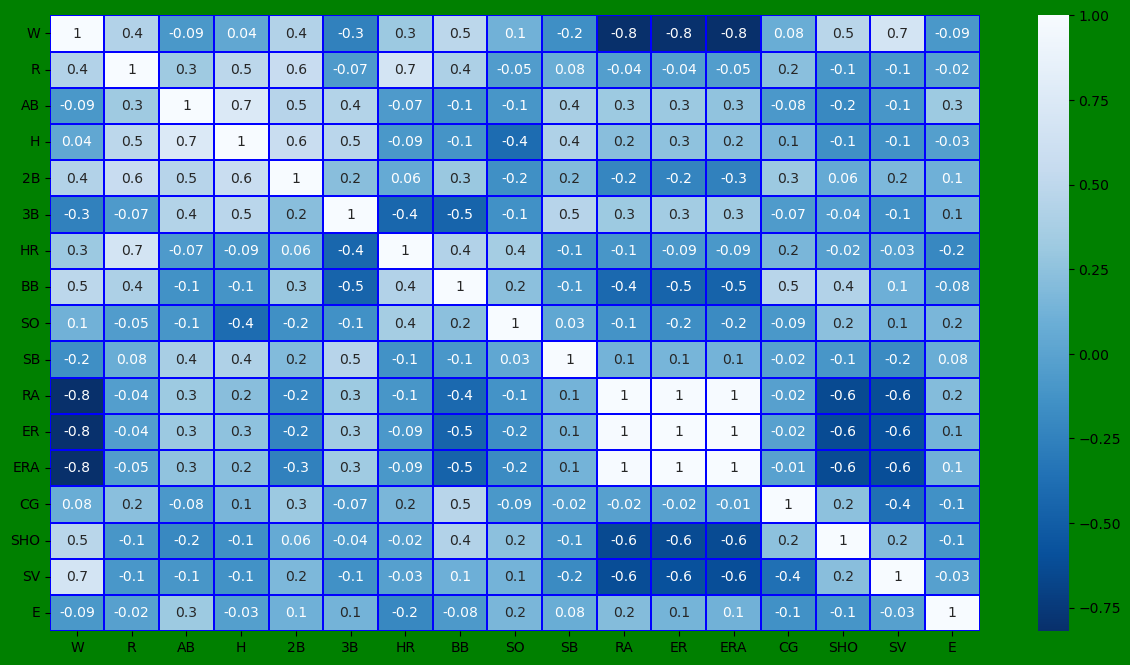

In [6]:
plt.figure(figsize=(15,8), facecolor='green')
sns.heatmap(data.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'b', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

we can see multicollinearity issue through this heat map so we need to drop certain columns to avoid such issue

In [7]:
#dropping the column which are not of high importance

data.drop(['AB'],axis=1,inplace=True)
data.drop(['ER'],axis=1,inplace=True)
data.drop(['ERA'],axis=1,inplace=True)




In [8]:
data.head()

,W,R,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,724,1497,300,42,139,383,973,104,641,2,8,56,88
1,83,696,1349,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,1395,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,1381,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,1515,289,49,151,455,1259,83,803,7,12,35,86


In [9]:
#the data is clean now we can check the describe method
data.describe()

,W,R,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,11.000000,21.000000,62.000000,126.000000


The data is almost balanced as we can see through describe method

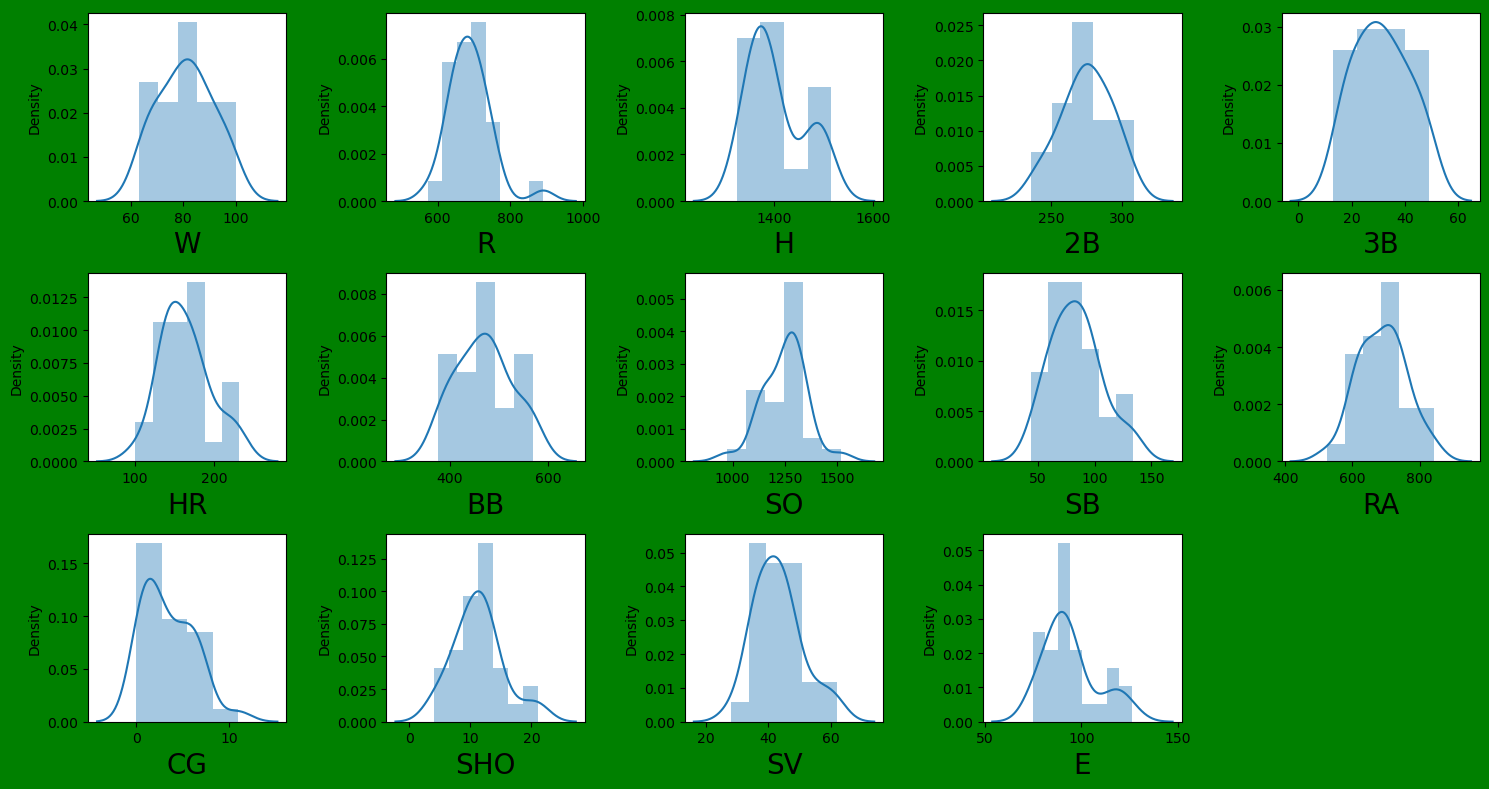

In [10]:
plt.figure(figsize=(15,8), facecolor='green')
plotnumber = 1

for column in data:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [11]:
data.skew()

W      0.047089
R      1.200786
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [12]:
#we will reduce the skewness through cube root method

data['R']=np.cbrt(data['R'])


In [13]:
data.skew()  #as we can see we have successfully reduced the skewness

W      0.047089
R      0.892970
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

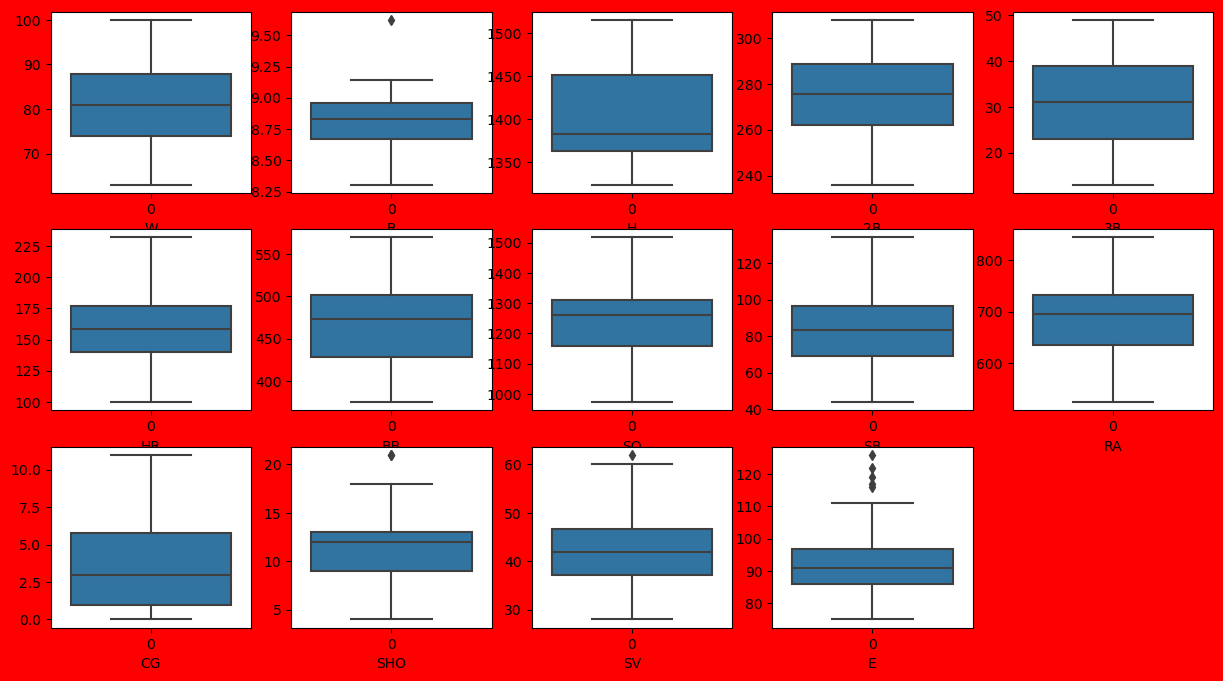

In [14]:
plt.figure(figsize=(15,8), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        
        
    plotnumber+=1
plt.show()

From the above box plot we can detect few outliers

In [15]:
y = data['W']
x = data.drop(columns = ['W'])

Here W is no of wins and w is our label rest of the input is features

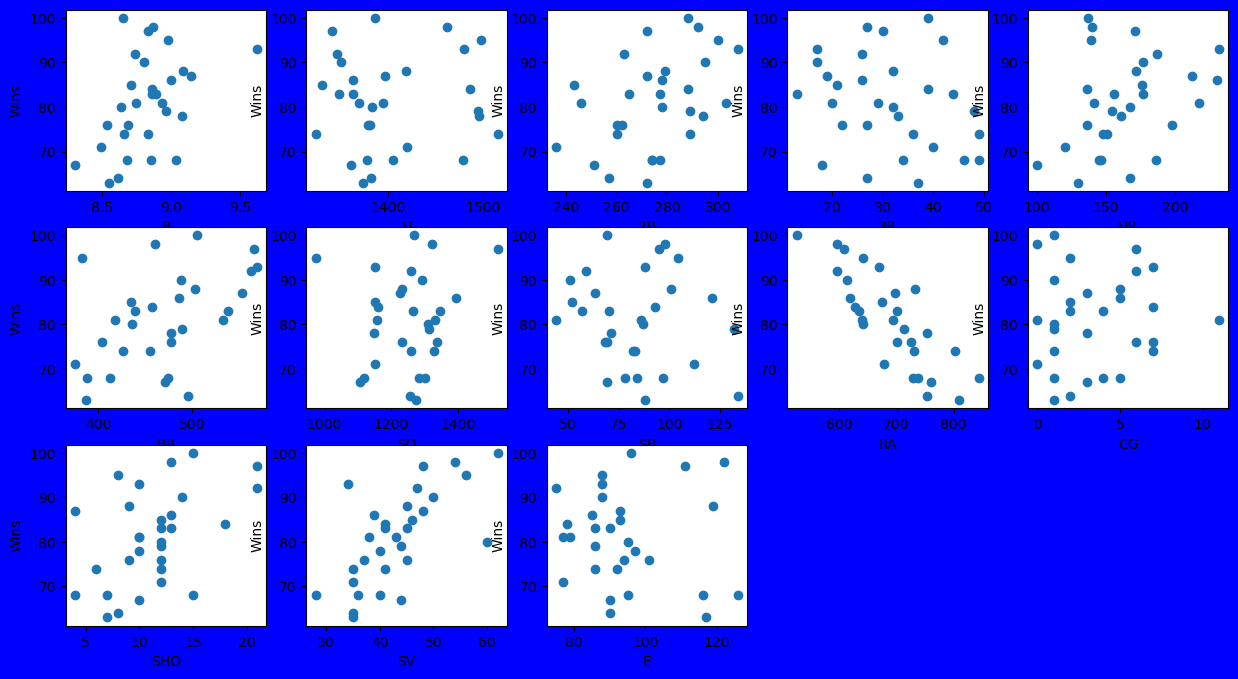

In [16]:
plt.figure(figsize=(15,8), facecolor='blue')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Wins', fontsize=10)
        
    plotnumber+=1
plt.show()

In [17]:
#scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [20]:
#splitting the data into training and testing so that we could make predictions further

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.30, random_state = 300)


In [21]:
regression = LinearRegression()
regression.fit(x_train, y_train)


LinearRegression()

In [26]:
regression.score(x_train,y_train) #here is the score of train data

0.9828917739172756

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score


In [27]:
regression.score(x_test,y_test) #here is the score of test data

0.6744235781968606

In [30]:
pred_LR = regression.predict(x_test)
pred_train=regression.predict(x_train)
print("r2_score:" , r2_score(y_test,pred_LR))
print("r2_score on training data:" ,r2_score(y_train,pred_train)*100 )
print("Mean absolute error:" ,mean_absolute_error(y_test, pred_LR))
print("Mean squared erroe:" ,mean_squared_error(y_test, pred_LR))
print("Root mean squared error:" ,np.sqrt(mean_squared_error(y_test, pred_LR)))


r2_score: 0.6744235781968606
r2_score on training data: 98.28917739172755
Mean absolute error: 5.010461127008469
Mean squared erroe: 37.67843676521765
Root mean squared error: 6.138276367614743


In [39]:
RFR = RandomForestRegressor()    #training the model
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [40]:
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_trained=RFR.predict(x_train)
print("r2_score:" , r2_score(y_test,pred_RFR))
print("r2_score on training data:" ,r2_score(y_train,pred_trained)*100 )
print("Mean absolute error:" ,mean_absolute_error(y_test, pred_RFR))
print("Mean squared erroe:" ,mean_squared_error(y_test, pred_RFR))
print("Root mean squared error:" ,np.sqrt(mean_squared_error(y_test, pred_RFR)))


r2_score: 0.5232668124599953
r2_score on training data: 93.79305491525423
Mean absolute error: 5.856666666666669
Mean squared erroe: 55.17156666666672
Root mean squared error: 7.427756502919756


In [31]:
import joblib
joblib.dump(regression, 'baseball_study.pkl')


['baseball_study.pkl']

we will use the linear regression model for making our predictions as it is giving the best score

In [32]:
RFC = joblib.load('baseball_study.pkl')

prediction = regression.predict(x_test)  
prediction


array([87.18164841, 69.54869636, 92.27993295, 97.28990641, 81.54670911,
       89.0873358 , 67.02807024, 92.89848   , 64.57080994])

In [33]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted']=prediction
data['Actual']=a
data


,Predicted,Actual
0,87.181648,87
1,69.548696,68
2,92.279933,98
3,97.289906,100
4,81.546709,76
5,89.087336,86
6,67.028070,74
7,92.898480,80
8,64.570810,71


Here is the actual and predicted score of our test dataset